# Demo: solving FizzBuzz with an MLP (Multi-Layer Perceptron)

### FizzBuzz is the following problem:

### For each of the numbers 1 to 100:
* if the number is divisible by 3, print "fizz"
* if the number is divisible by 5, print "buzz"
* if the number is divisible by 15, print "fizzbuzz"
* otherwise, just print the number

In [1]:
import numpy as np 
from dl_lib.train import train
from dl_lib.neural_net import NeuralNet
from dl_lib.layers import Linear, Tanh
from dl_lib.optim import SGD
from typing import List
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
np.random.seed(255)

In [2]:
def fizz_buzz_encode(x: int) -> List[int]:
    """
    Return a categorical encoding of a correct FizzBuzz output.
    """
    if x % 15 == 0:
        return [0, 0, 0, 1]
    elif x % 5 == 0:
        return [0, 0, 1, 0]
    elif x % 3 == 0:
        return [0, 1, 0, 0]
    else:
        return [1, 0, 0, 0]

In [3]:
def binary_encode(x: int) -> List[int]:
    """
    10 digit binary encoding of x
    """
    return [x >> i & 1 for i in range(10)]

In [4]:
# Mapping. We expect to see targets[i] given inputs[i].
inputs = np.array([
    binary_encode(x)
    for x in range(101, 1024)
])

targets = np.array([
    fizz_buzz_encode(x)
    for x in range(101, 1024)
])

In [5]:
# Simple MLP (Multi-Layer Perceptron) neural network. 
mlp = NeuralNet([
    Linear(input_size=10, output_size=50),
    Tanh(),
    Linear(input_size=50, output_size=4)
])

loss_values = train(mlp,
                    inputs,
                    targets,
                    num_epochs=5000,
                    optimizer=SGD(lr=0.001))

epoch_nums = [n for n in range(1, len(loss_values) + 1)]

100%|██████████| 5000/5000 [00:20<00:00, 248.77it/s]


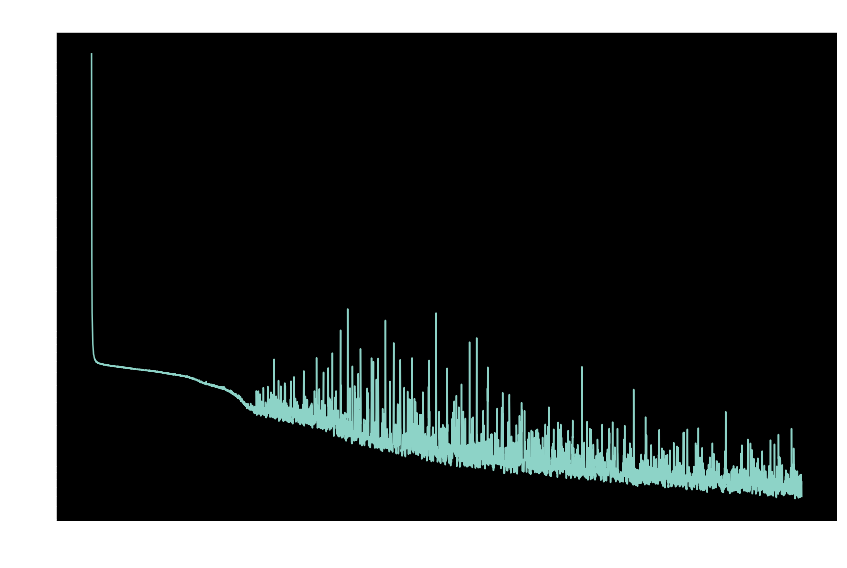

In [6]:
plt.figure(figsize=(14, 9))
plt.title("Loss During Training Epochs - Logarithmic Scale", fontsize=24)
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.yscale("log")
plt.plot(epoch_nums, loss_values);

In [8]:
# Testing FizzBuzz net on values from 1 to 100.
predicted_labels, actual_labels = [], []
for x in range(1, 101):
    predicted = mlp.forward(binary_encode(x))
    predicted_idx = np.argmax(predicted)
    actual_idx = np.argmax(fizz_buzz_encode(x))
    labels = [str(x), "fizz", "buzz", "fizzbuzz"]
    predicted_labels.append(predicted_idx)
    actual_labels.append(actual_idx)
    print(x, labels[predicted_idx], labels[actual_idx])

1 fizz 1
2 2 2
3 fizz fizz
4 4 4
5 buzz buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 13 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 buzz buzz
21 fizz fizz
22 22 22
23 fizz 23
24 fizz fizz
25 buzz buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 54 fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 63 fizz
64 64 64
65 buzz buzz
66 fizz fizz
67 67 67
68 68 68
69 fizz fizz
70 buzz buzz
71 71 71
72 fizz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 77 77
78 fizz fizz
79 79 79
80 buzz buzz
81 fizz fizz
82 82 82
83 83 83
84 fizz fizz
85 buzz buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz f

In [9]:
accuracy_score(actual_labels, predicted_labels)

0.95

### This simple multi-layer perceptron achieves a 95% accuracy score on FizzBuzz given this particular random seed, set of parameters, and set of inputs. 